<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week8/convolution_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution: Introduction and Applications Beyond CNN

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

## Manual Example of Convolution

Manual convolution at center (2,2):
Window:
[[ 70.  80.  90.]
 [120. 130. 140.]
 [170. 180. 190.]]
Kernel:
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]
Result: 0.0


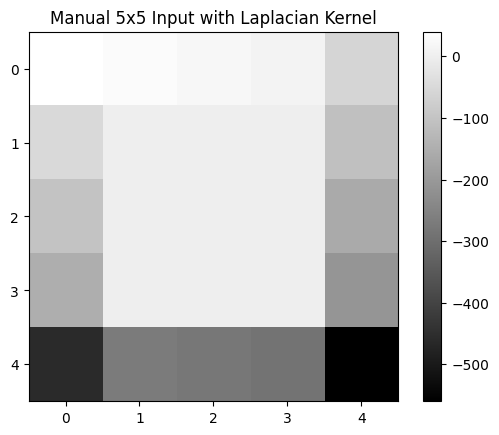

In [4]:
# --- Manual Example of Convolution ---

# Small input (5x5) and kernel (3x3)
small_input = np.array([
    [10, 20, 30, 40, 50],
    [60, 70, 80, 90, 100],
    [110, 120, 130, 140, 150],
    [160, 170, 180, 190, 200],
    [210, 220, 230, 240, 250]
], dtype=np.float32)

example_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)  # Laplacian kernel

# Manually compute one step of convolution at center (2,2)
window = small_input[1:4, 1:4]  # center 3x3 patch around pixel (2,2)
result = np.sum(window * example_kernel)

print("Manual convolution at center (2,2):")
print("Window:")
print(window)
print("Kernel:")
print(example_kernel)
print(f"Result: {result}")

# Visualize full convolution result using apply_kernel
conv_result = apply_kernel(small_input, example_kernel)
plt.figure()
plt.imshow(conv_result, cmap='gray')
plt.title("Manual 5x5 Input with Laplacian Kernel")
plt.colorbar()

In [14]:
# --- Utility Functions ---

def load_image_gray(path):
    """Load image and extract the red channel as grayscale approximation."""
    img = np.array(Image.open(path))
    red = img[:, :, 0].astype(np.float32)
    return img, red

def load_image_rgb(path):
    """Load full RGB image as float32 array."""
    img = np.array(Image.open(path)).astype(np.float32)
    return img

def apply_kernel(image, kernel):
    """Apply a 2D convolution kernel to an image using TensorFlow."""
    kernel = np.array(kernel, dtype=np.float32)
    image_tf = tf.constant(image[np.newaxis, :, :, np.newaxis])  # shape [1, H, W, 1]
    kernel_tf = tf.constant(kernel[:, :, np.newaxis, np.newaxis])
    result = tf.nn.conv2d(image_tf, kernel_tf, strides=1, padding='SAME')
    return tf.squeeze(result).numpy()

def normalize_kernel(kernel):
    """Normalize the kernel if it's meant for averaging (e.g. blur)."""
    k = np.array(kernel, dtype=np.float32)
    if k.shape[0] * k.shape[1] > 1 and np.sum(np.abs(k)) > 1:
        return k / np.sum(k)
    return k

In [10]:
kernels = {
    "Identity (no change)": {
        "kernel": [
            [0, 0, 0],
            [0, 1, 0],
            [0, 0, 0]
        ],
        "description": "Leaves the image unchanged. Useful as a control."
    },
    "Brighten center (1.5)": {
        "kernel": [
            [0, 0, 0],
            [0, 1.5, 0],
            [0, 0, 0]
        ],
        "description": "Brightens the center pixel, making the image lighter."
    },
    "Blur (averaging filter)": {
        "kernel": [
            [1, 1, 1, 1],
            [1, 1, 1, 1],
            [1, 1, 1, 1]
        ],
        "description": "Smooths the image by averaging neighboring pixels."
    },
    "Gaussian blur (approximate)": {
        "kernel": [
            [1, 2, 1],
            [2, 4, 2],
            [1, 2, 1]
        ],
        "description": "Smooths the image with a Gaussian-shaped weighting."
    },
    "Sharpen (detail enhancement)": {
        "kernel": [
            [0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]
        ],
        "description": "Enhances local contrast by amplifying the center pixel."
    },
    "Edge glow (artistic)": {
        "kernel": [
            [-1, -1, -1],
            [-1, 9, -1],
            [-1, -1, -1]
        ],
        "description": "Sharpens the image and adds edge emphasis."
    },
    "Edge enhancement (Laplacian)": {
        "kernel": [
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]
        ],
        "description": "Highlights regions of rapid intensity change."
    },
    "Emboss (relief effect)": {
        "kernel": [
            [1, 1, 0],
            [1, 0, -1],
            [0, -1, -1]
        ],
        "description": "Creates a 3D-like shadow effect."
    },
    "Sobel X (vertical edges)": {
        "kernel": [
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]
        ],
        "description": "Detects vertical edges using the Sobel operator."
    },
    "Vertical edge detection": {
        "kernel": [
            [255, 0, -255],
            [255, 0, -255],
            [255, 0, -255]
        ],
        "description": "Strong edge detector for vertical lines."
    },
    "Horizontal edge detection": {
        "kernel": [
            [255, 255, 255],
            [1, 1, 1],
            [-255, -255, -255]
        ],
        "description": "Strong edge detector for horizontal lines."
    },
    "Blob detection": {
        "kernel": [
            [0, -10, -10, 0],
            [-10, 20, 20, -10],
            [-10, 20, 20, -10],
            [0, -10, -10, 0]
        ],
        "description": "Responds to blob-like structures (regions of contrast)."
    },
    "Diagonal edge detection": {
        "kernel": [
            [1, 1, 0],
            [1, 0, -1],
            [1, -1, -1]
        ],
        "description": "Highlights diagonal transitions in intensity."
    }
}


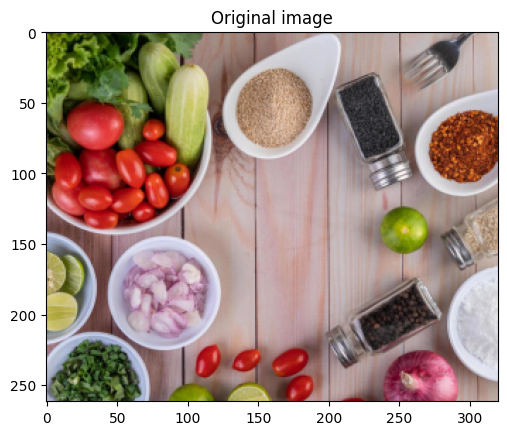

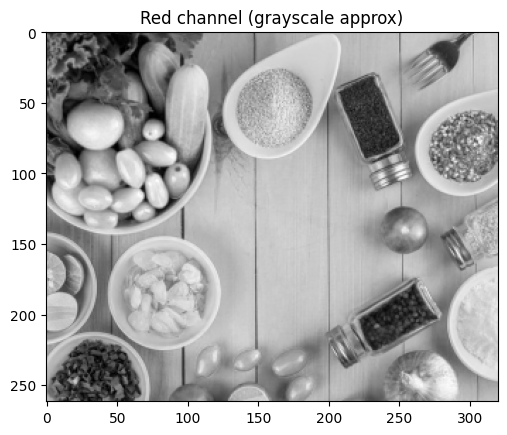

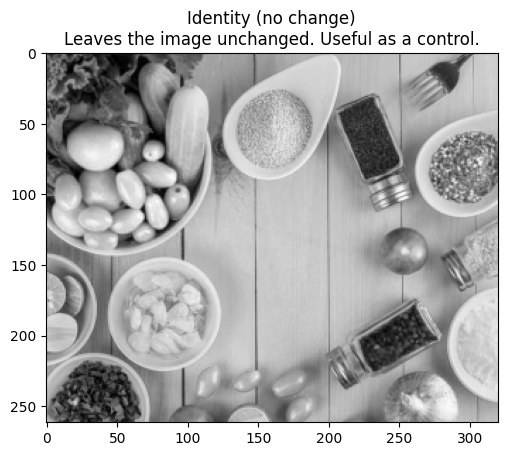

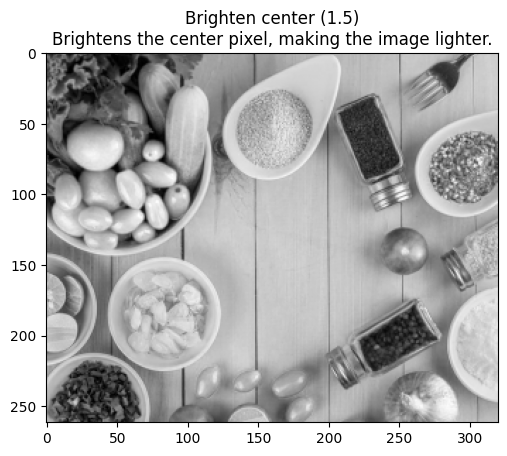

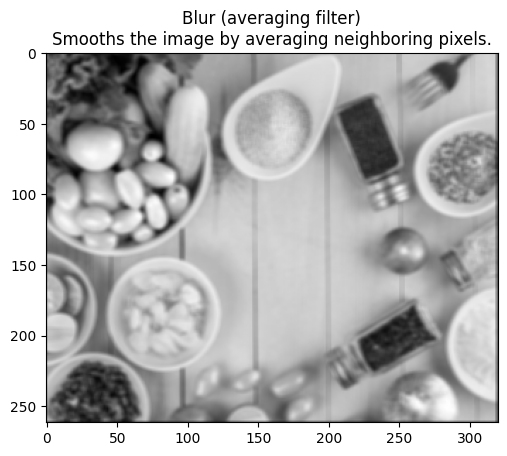

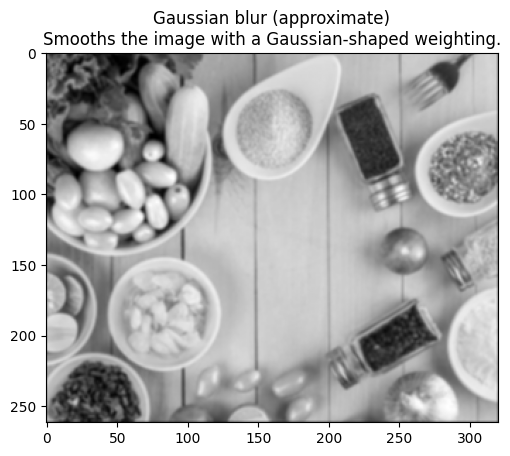

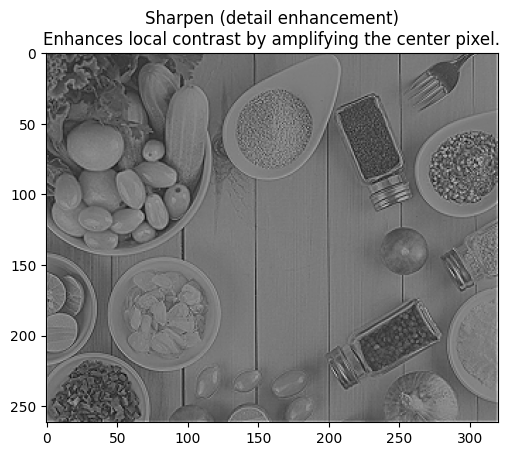

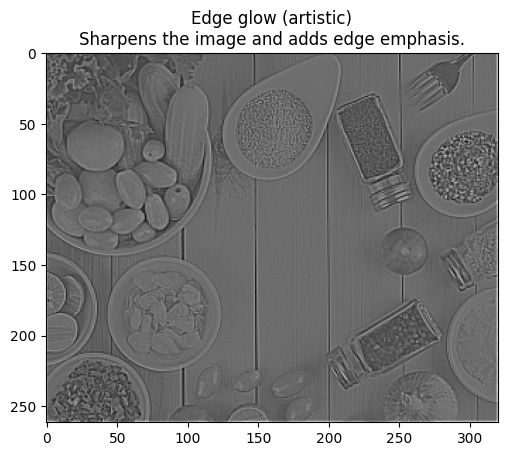

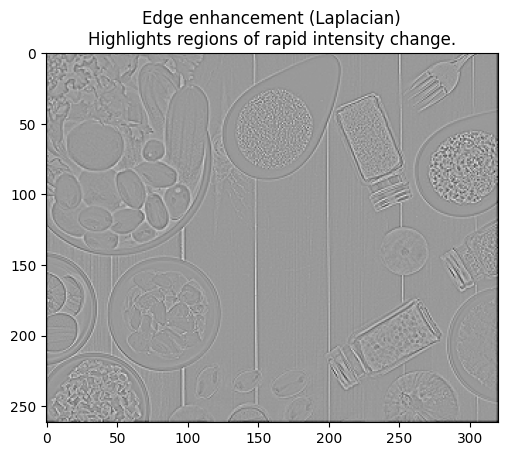

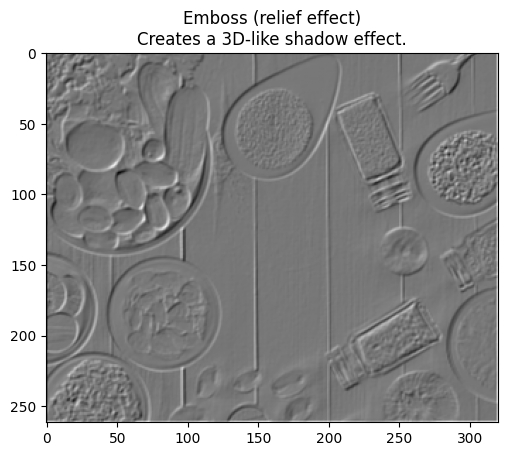

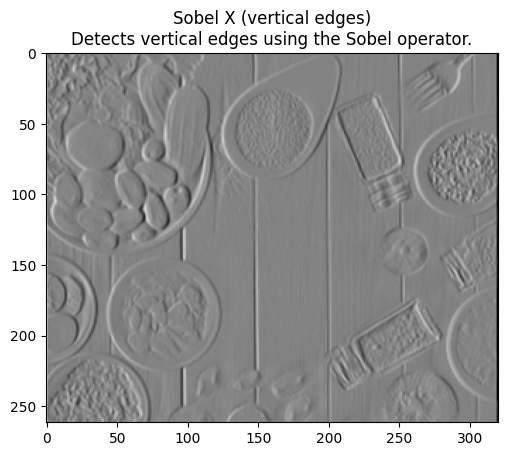

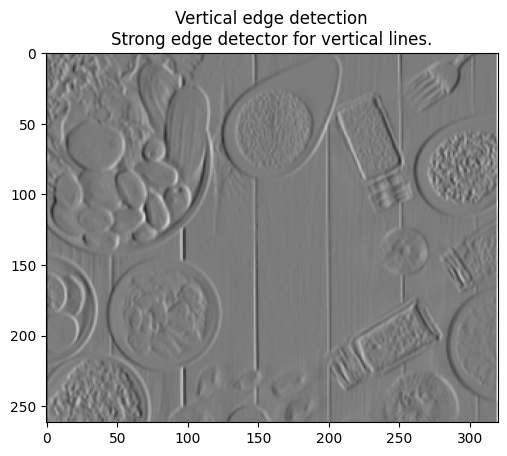

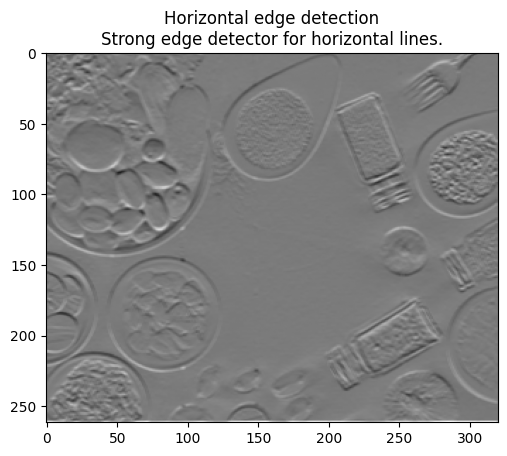

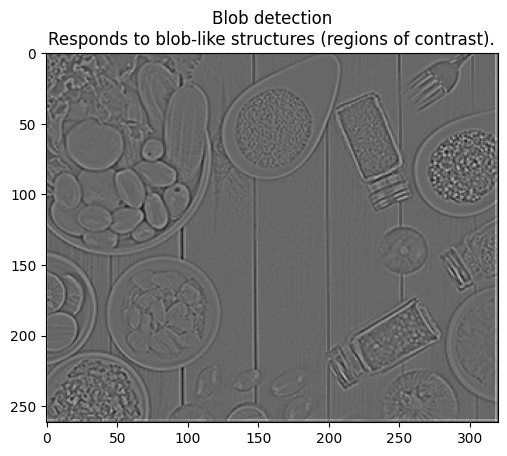

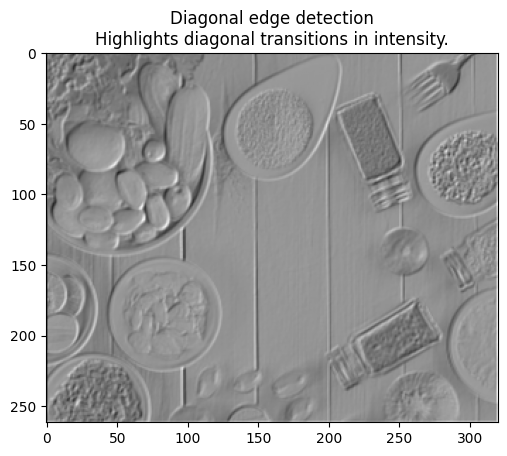

In [12]:
# --- Load Real Image ---

img_path = "mark.png"  # Change as needed
img_path = "kitchen.png"  # Change as needed
img, red = load_image_gray(img_path)

plt.figure(); plt.imshow(img); plt.title("Original image")
plt.figure(); plt.imshow(red, cmap='gray'); plt.title("Red channel (grayscale approx)")



# --- Apply Filters and Visualize ---

for name, item in kernels.items():
    kernel = normalize_kernel(item["kernel"]) if "Blur" in name else np.array(item["kernel"], dtype=np.float32)
    conv = apply_kernel(red, kernel)

    plt.figure()
    plt.imshow(conv, cmap='gray')
    plt.title(f"{name}\n{item['description']}")

plt.show()


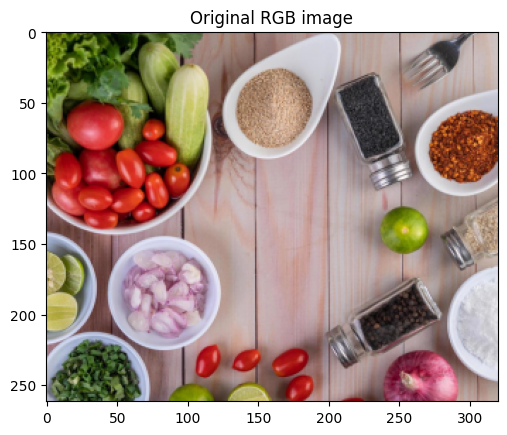

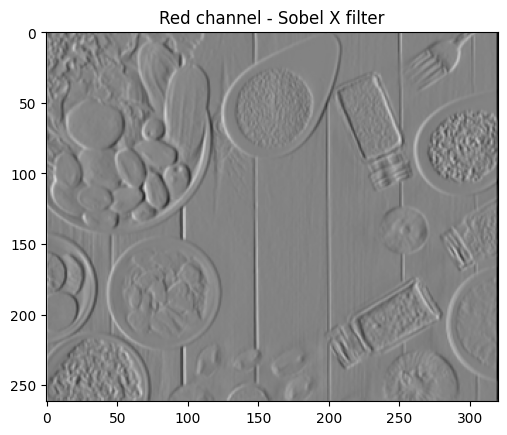

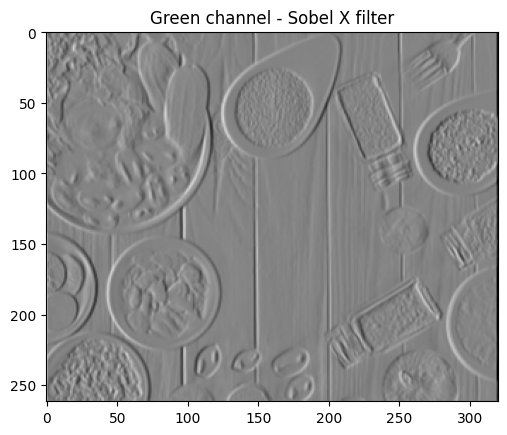

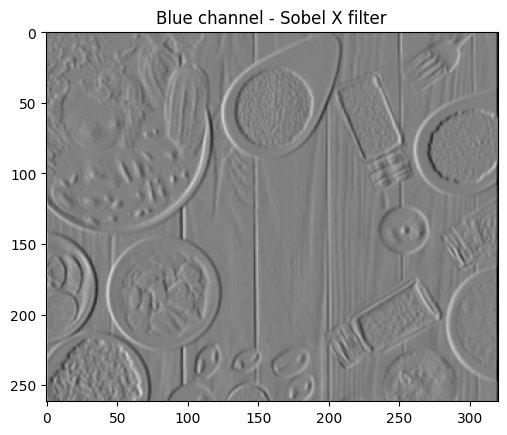

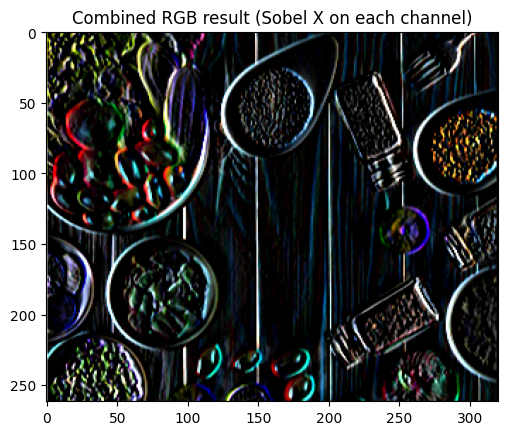

In [15]:
img_path = "kitchen.png"  # Use your colorful image path here
img_rgb = load_image_rgb(img_path)

plt.figure(); plt.imshow(img_rgb.astype(np.uint8)); plt.title("Original RGB image")

# --- Kernel for Demonstration ---

sobel_x = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]

# --- Apply the same kernel to R, G, B channels separately ---

channels = ['Red', 'Green', 'Blue']
results = []

for i, name in enumerate(channels):
    channel = img_rgb[:, :, i]
    filtered = apply_kernel(channel, sobel_x)
    results.append(filtered)
    plt.figure()
    plt.imshow(filtered, cmap='gray')
    plt.title(f"{name} channel - Sobel X filter")

# --- Merge filtered channels back into one RGB image ---
merged = np.stack(results, axis=-1)
merged_clipped = np.clip(merged, 0, 255).astype(np.uint8)

plt.figure()
plt.imshow(merged_clipped)
plt.title("Combined RGB result (Sobel X on each channel)")
plt.show()
